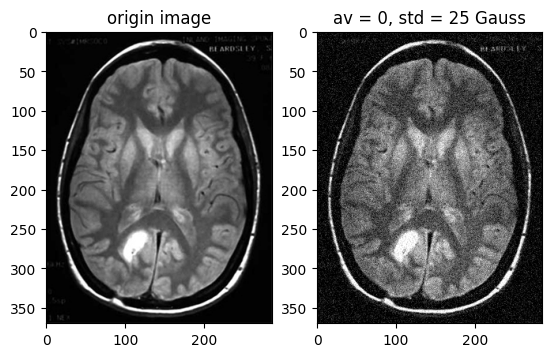

In [563]:
import cv2 as cv
import os
import numpy as np
import matplotlib.pyplot as plt
data = np.load('lab4.npy')
P = data.shape[0]
Q = data.shape[1]
plt.subplot(1,2,1)
plt.title("origin image")
plt.imshow(data,cmap='gray')
data_1 = data

noise_1 = np.random.normal(0,25,data_1.shape)
result1 = data_1 + noise_1
#设置图片添加高斯噪声之后的像素值的范围
result1 = np.clip(result1,a_min=0,a_max=255)

plt.subplot(122)
plt.title("av = 0, std = 25 Gauss")
plt.imshow(result1,cmap='gray')



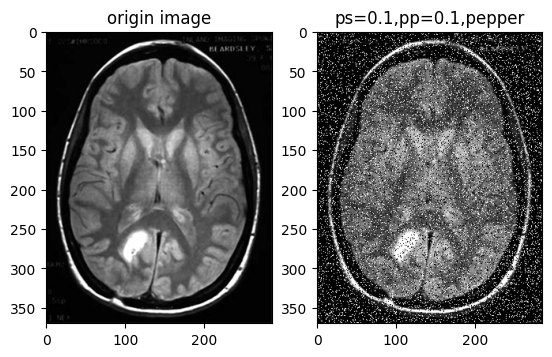

In [564]:
plt.subplot(1,2,1)
plt.title("origin image")
plt.imshow(data,cmap='gray')
data = np.load('lab4.npy')
result2_1 = data

ps = 1/2
p = 0.2
# ps=0.1，pp=0.1
# 椒盐噪声 
for i in range(1,P):
    for j in range(1,Q):
        if(np.random.rand() < p):
            if(np.random.rand() < ps):
                result2_1[i,j] = 255
            else:
                result2_1[i,j] = 0

plt.subplot(1,2,2)
plt.title("ps=0.1,pp=0.1,pepper")
plt.imshow(result2_1,cmap='gray')


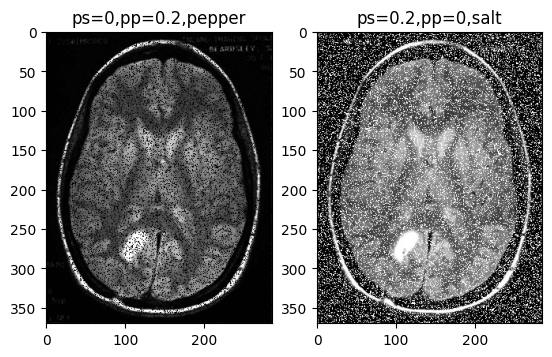

In [565]:
data = np.load('lab4.npy')
result2_2 = data
ps = 0
p = 0.2
# ps=0，pp=0.2
# 胡椒噪声
for i in range(1,P):
    for j in range(1,Q):
        if(np.random.rand() < p):
            if(np.random.rand() < ps):
                result2_2[i,j] = 255
            else:
                result2_2[i,j] = 0

plt.subplot(1,2,1)
plt.title("ps=0,pp=0.2,pepper")
plt.imshow(result2_2,cmap='gray')
data = np.load('lab4.npy')
result2_3 = data
ps = 1
p = 0.2
# ps=0.2，pp=0
# 盐粒噪声
for i in range(1,P):
    for j in range(1,Q):
        if(np.random.rand() < p):
            if(np.random.rand() < ps):
                result2_3[i,j] = 255
            else:
                result2_3[i,j] = 0

plt.subplot(1,2,2)
plt.title("ps=0.2,pp=0,salt")
plt.imshow(result2_3,cmap='gray')

In [566]:
# median filter
def returnSurround(data,i,j,max_x,max_y):
    result = []
    result.append(data[i,j])
    if(i-1>=0 and j-1>=0):
        result.append(data[i-1,j-1])
    if(i>=0 and j-1>=0):
        result.append(data[i,j-1])
    if(i+1<=max_x and j-1>=0):
        result.append(data[i+1,j-1])    
    if(i-1>=0 and j>=0):
        result.append(data[i-1,j])
    if(i+1<=max_x and j>=0):
        result.append(data[i+1,j]) 
    if(i-1>=0 and j+1<=max_y):
        result.append(data[i-1,j+1])
    if(i>=0 and j+1<=max_y):
        result.append(data[i,j+1])
    if(i+1<=max_x and j+1<=max_y):
        result.append(data[i+1,j+1]) 
    result.sort(key = float)
# result collects all items around the data[i,j] include itself
    if(len(result) % 2 == 0):
        return (result[int(len(result)/2)]+result[int(len(result)/2-1)])/2
    else:
        return result[int((len(result)+1)/2)-1]
    
    

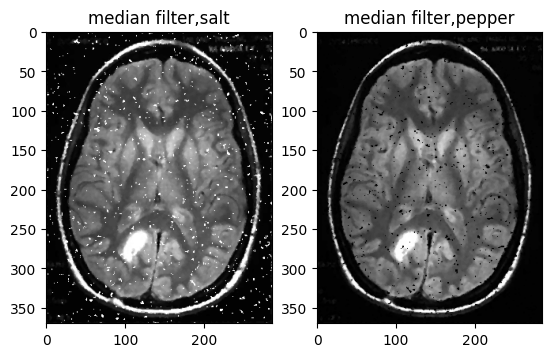

In [567]:
data = np.load('lab4.npy')
result2_4 = data
result2_4_0 = data
P = data.shape[0]
Q = data.shape[1]

# 对盐粒噪声的中值滤波
for i in range(0,P):
    for j in range(0,Q):
        result2_4[i,j] = returnSurround(result2_3,i,j,P-1,Q-1)

plt.subplot(121)
plt.title("median filter,salt")
plt.imshow(result2_4,cmap='gray')

# 对胡椒噪声的中值滤波
for i in range(0,P):
    for j in range(0,Q):
        result2_4_0[i,j] = returnSurround(result2_2,i,j,P-1,Q-1)

plt.subplot(122)
plt.title("median filter,pepper")
plt.imshow(result2_4_0,cmap='gray')


In [568]:
def harmonic_averaging_filter(data, ksize = 3): #谐波平均滤波器
    
    pad = 1     #pad size
    img_pad = np.zeros((P+pad*2,Q+pad*2))       #new data after padding  (P+1)*(Q+1)
    img_pad[1:P+pad,1:Q+pad] = data     
    data_result = data
    bais = 1e-8
    for i in range(pad,pad+P):
        for j in range(pad,pad+Q):
            temp = np.sum(1.0/(img_pad[i-pad:i+pad,j-pad:j+pad]+bais))
            data_result[i-pad][j-pad] = ksize * ksize / temp
    return data_result

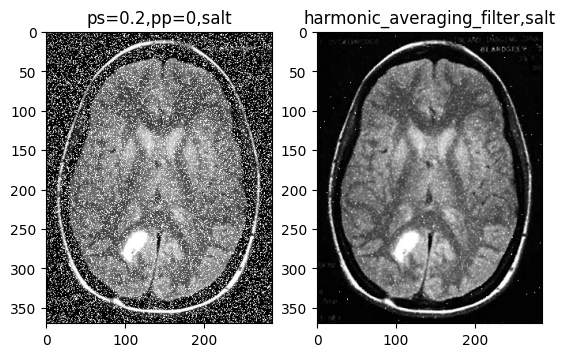

In [569]:
data = np.load('lab4.npy')
result2_2 = data
ps = 0
p = 0.2
# ps=0，pp=0.2
for i in range(1,P):
    for j in range(1,Q):
        if(np.random.rand() < p):
            if(np.random.rand() < ps):
                result2_2[i,j] = 255
            else:
                result2_2[i,j] = 0
result2_5_0 = result2_2


result2_6 = harmonic_averaging_filter(result2_2)


data = np.load('lab4.npy')
result2_3 = data
ps = 1
p = 0.2
# ps=0.2，pp=0
for i in range(1,P):
    for j in range(1,Q):
        if(np.random.rand() < p):
            if(np.random.rand() < ps):
                result2_3[i,j] = 255
            else:
                result2_3[i,j] = 0

plt.subplot(1,2,1)
plt.title("ps=0.2,pp=0,salt")
plt.imshow(result2_3,cmap='gray')
result2_6 = harmonic_averaging_filter(result2_3)
#谐波平均滤波,盐粒
plt.subplot(1,2,2)
plt.title("harmonic_averaging_filter,salt")
plt.imshow(result2_6,cmap='gray')


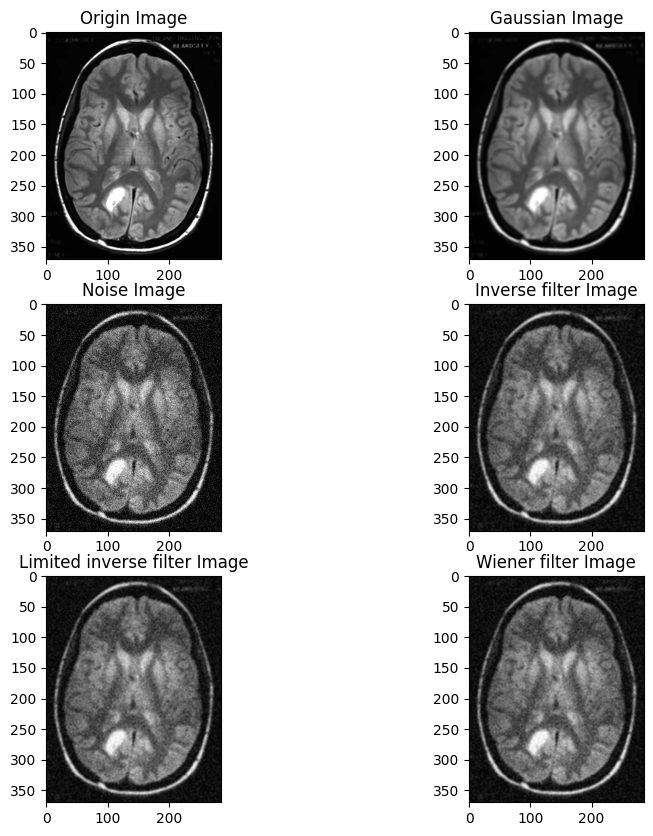

In [562]:
# Project 3
# 原图像
data = np.load('lab4.npy')
plt.figure(figsize=(10, 10))

plt.subplot(3,2,1)
plt.title("Origin Image")
plt.imshow(data,cmap='gray')

# 高斯模糊
kernel_size = (5,5) #高斯核大小
sigma = 2           #标准差
img_blurred = cv.GaussianBlur(data, kernel_size, sigma)
plt.subplot(3,2,2)
plt.title('Gaussian Image')
plt.imshow(img_blurred, cmap='gray')


# 添加高斯噪声
mean = 0.2          #均值
variance = 1000     #标准差
sigma = np.sqrt(variance)
Gauss_noise = np.random.normal(mean, sigma, data.shape)
img_noisy = np.clip(img_blurred + Gauss_noise, 0, 255).astype(np.float32)
plt.subplot(3,2,3)
plt.title('Noise Image')
plt.imshow(img_noisy, cmap= 'gray')

# 反向滤波器
kernel = np.array([[0.1,0.1,0.1],
                    [0.1,0.1,0.1],
                    [0.1,0.1,0.1]])

# 已知模糊核的逆滤波
img_deconv_inverse = cv.filter2D(img_noisy, -1, np.linalg.pinv(kernel))
plt.subplot(3,2,4)
plt.title('Inverse filter Image')
plt.imshow(img_deconv_inverse, cmap='gray')


# 已知模糊核的有限逆滤波
sdb = 1.3   # 信噪比
img_deconv_limited = cv.filter2D(img_noisy, -1, kernel/(kernel**2 + 1/sdb))
plt.subplot(3,2,5)
plt.title('Limited inverse filter Image')
plt.imshow(img_deconv_limited, cmap='gray')


# 已知模糊核的维纳滤波
img_deconv_wiener = cv.filter2D(img_noisy, -1, kernel/(kernel**2 + variance/sdb))
plt.subplot(3,2,6)
plt.title('Wiener filter Image')
plt.imshow(img_deconv_wiener, cmap ='gray')




如果模糊内核未知怎么办？
1.图像观察估计
假设有一幅退化图像，而没有关于退化函数H的任何知识。基于图像被线性、位置不变的过程退化的假设，估计H的一种方法就是从图像本身来收集数据，可基于位置不变的假设还原完整的退化函数H(u,v)。这种方法是仅在特殊环境下使用的烦琐处理。
2.试验估计
与退化图像类似的图像可以通过各种系统设置得到，直到这些图像退化到尽可能接近我们希望复原的图像。之后，使用相同的系统对一个冲激（小亮点）成像，得到退化的冲击响应。一个冲激可由一个亮点来模拟，该点应尽可能亮，以便将噪声的影响降低到可以忽略的程度。
3.建模估计
由于退化建模能解决图像复原问题，因此多年来一直被人们使用。大气湍流模型/运动模糊模型


参考资料：
1.数字图像处理第五章——图像复原与重建 https://blog.csdn.net/fjyalzl/article/details/125714553

2.【OpenCV 例程 300 篇】107. 退化图像的维纳滤波 https://blog.csdn.net/youcans/article/details/123062695

3.空间滤波-谐波平均滤波器 https://blog.csdn.net/qq_44886601/article/details/127453271?ops_request_misc=%257B%2522request%255Fid%2522%253A%2522168196128516800197079634%2522%252C%2522scm%2522%253A%252220140713.130102334..%2522%257D&request_id=168196128516800197079634&biz_id=0&utm_medium=distribute.pc_search_result.none-task-blog-2~all~sobaiduend~default-1-127453271-null-null.142^v85^koosearch_v1,239^v2^insert_chatgpt&utm_term=%E8%B0%90%E6%B3%A2%E5%B9%B3%E5%9D%87%E6%BB%A4%E6%B3%A2&spm=1018.2226.3001.4187